 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gerberlab/MDSINE2_Paper/blob/main/tutorials/tut_01_viz_data.ipynb)

# Tutorial 1: Understanding and visualizing data
MDSINE2 uses the following data files to infer the dynamics of the microbial network:  
1. Count data of microbial abundances
2. Taxonomy information corresponding to the count data
3. A "metadata" file mapping sample IDs to subject IDs and timepoints
4. A file specifying the experimental perturbations
5. Quantitative measurements of absolute abundnace via qPCR

We'll start by looking at some examples of these files and plot their contents.

Our experiment contained 4 subjects, with subject IDs 2, 3, 4, and 5. Stool samples were collected over a period of 77 days, with samples collected more frequently near the experimental perturbations. In these tutorials, we'll use a truncated version of the dataset containing only the top 15 most abundant ASVs.

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !curl -LJO https://github.com/gerberlab/MDSINE2_Paper/raw/main/datasets/gibson/tutorial_data/healthy-toy.zip
    !mkdir -p ./datasets/gibson/tutorial_data/
    !unzip -o healthy-toy.zip -d ./datasets/gibson/tutorial_data/

    !git clone https://github.com/gerberlab/MDSINE2
    !pip install MDSINE2/.

else:
    # If running locally, ensure data paths are correct and MDSINE2 is installed.
    %cd ..

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 22392  100 22392    0     0  47913      0 --:--:-- --:--:-- --:--:--  575k
Archive:  healthy-toy.zip
  inflating: ./datasets/gibson/tutorial_data/healthy-toy/perturbations.tsv  
  inflating: ./datasets/gibson/tutorial_data/healthy-toy/qpcr.tsv  
  inflating: ./datasets/gibson/tutorial_data/healthy-toy/metadata.tsv  
  inflating: ./datasets/gibson/tutorial_data/healthy-toy/counts.tsv  
  inflating: ./datasets/gibson/tutorial_data/healthy-toy/rdp_species.tsv  
fatal: destination path 'MDSINE2' already exists and is not an empty directory.
Processing ./MDSINE2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mdsine2: filename=mdsine2-0.5.0-py3-none

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Our data will be stored within this folder.
data_dir = Path('./datasets/')
healthy_dir = data_dir / 'gibson' / 'tutorial_data' / 'healthy-toy'

In [3]:
# Read the data files. Our data is stored in tab-seperated files in `data_dir`.
# This line finds all tsv files in the specified directory.
tsv_files = sorted(healthy_dir.glob('*.tsv'))
tsv_files = {f.stem : f for f in tsv_files}

if len(tsv_files.keys()) > 0:
    for key in tsv_files.keys():
        print(f"Found file {tsv_files[key]}")
else:
    print("Can't find any `*.tsv` files!")

Found file datasets/gibson/tutorial_data/healthy-toy/counts.tsv
Found file datasets/gibson/tutorial_data/healthy-toy/metadata.tsv
Found file datasets/gibson/tutorial_data/healthy-toy/perturbations.tsv
Found file datasets/gibson/tutorial_data/healthy-toy/qpcr.tsv
Found file datasets/gibson/tutorial_data/healthy-toy/rdp_species.tsv


## Count data
First, let's look at the top-10 ASVs in the `counts.tsv` file. The column names indicate the sample ID, and rows are indexed by ASV. A table like this may be generated, for example, by `dada2`.

After, we'll convert our counts table to relative abundance by dividing each column by it's read depth. We'll plot this data later on.

In [4]:
counts = pd.read_csv(tsv_files['counts'], index_col=0, sep='\t')
counts = counts.head(n = 15)
counts.head(n = 10)

,2-D0AM,2-D0PM,2-D10,2-D11,2-D14,2-D16,2-D18,2-D1AM,2-D1PM,2-D21AM,...,5-D60AM,5-D60PM,5-D61,5-D62,5-D63,5-D64AM,5-D64PM,5-D7,5-D8,5-D9
name,,,,,,,,,,,,,,,,,,,,,
ASV_1,1099,3299,1112,1637,7887,9432,3124,1742,195,3446,...,218,409,2072,1160,723,1043,1732,4008,2924,3879
ASV_2,180,826,135,106,235,426,546,1338,4577,253,...,2282,3729,6898,4491,4880,5940,7070,420,307,1267
ASV_3,10,7,88,81,97,113,0,10,23,0,...,5,45,28,0,0,0,0,0,0,101
ASV_4,3,0,3793,2713,2683,3423,5351,9,32,3815,...,8539,12437,15397,6717,4179,3597,5020,1334,895,2242
ASV_5,6,13,8074,4830,9646,5663,11136,194,514,8566,...,2,6,2011,2944,9708,1664,2578,8503,3163,6059
ASV_6,0,0,5852,3034,6870,6102,9957,2,7,4626,...,1855,3481,5015,3096,2779,3302,1941,4714,2275,1903
ASV_7,67,173,106,59,138,286,417,814,2375,190,...,1201,2013,3662,2440,2729,3361,3894,266,250,840
ASV_8,44,49,17121,6722,16792,29142,35796,711,2686,15420,...,0,0,0,0,0,0,0,13574,5638,5432
ASV_9,178,726,35,27,21,52,59,0,20,0,...,0,4,0,0,0,0,0,6,0,0


In [5]:
read_depth = counts.sum(axis=0)
rel_abund = counts / read_depth
print('Check: all columns of `rel_abund` dataframe sum to 1?', np.isclose(rel_abund.sum(axis=0), 1).all())

Check: all columns of `rel_abund` dataframe sum to 1? True


## Taxonomy
Let's also look at the taxonomy file, which maps ASVs to their taxon. Note, the index of `counts.tsv` and `rdp_species.tsv` match.

In [6]:
rdp = pd.read_csv(tsv_files['rdp_species'], index_col=0, sep='\t')
rdp = rdp.fillna('unspecified')
rdp.head(n = 10)

,sequence,kingdom,phylum,class,order,family,genus,species
name,,,,,,,,
ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,unspecified
ASV_2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_3,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila
ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,cellulosilyticus/timonensis
ASV_5,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,unspecified
ASV_6,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Sutterellaceae,Parasutterella,excrementihominis
ASV_7,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_8,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_9,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,dorei/fragilis


## Metadata
The columns in `counts.tsv` are indexed by sample ID, but aren't necessarily ordered by time. The mapping between sample ID and temporal index is stored in the metadata file.

In [7]:
metadata = pd.read_csv(tsv_files['metadata'], index_col = 0, sep='\t')
metadata.head(n = 10)

,subject,time
sampleID,,
2-D0AM,2,0.0
2-D0PM,2,0.5
2-D10,2,10.0
2-D11,2,11.0
2-D14,2,14.0
2-D16,2,16.0
2-D18,2,18.0
2-D1AM,2,1.0
2-D1PM,2,1.5


## Perturbations
In our experiment, three perturbations were applied to each subject. The `perturbations.tsv` file contains the name, start time, and end time for each peturbation.

In [8]:
perturbations = pd.read_csv(tsv_files['perturbations'], index_col = 0, sep='\t')
perturbations.head(n = 10)

,start,end,subject
name,,,
High Fat Diet,21.5,28.5,2
High Fat Diet,21.5,28.5,3
High Fat Diet,21.5,28.5,4
High Fat Diet,21.5,28.5,5
High Fat Diet,21.5,28.5,6
High Fat Diet,21.5,28.5,7
High Fat Diet,21.5,28.5,8
High Fat Diet,21.5,28.5,9
High Fat Diet,21.5,28.5,10


## qPCR
In order to quantify the absolute abundance of each microbe within each sample, we need a quantitative reference of the total microbial content. Each row in this qPCR data corresponds to a column in the count table indicating three measurements of the total microbial abundance.

In [9]:
qpcr = pd.read_csv(tsv_files['qpcr'], index_col = 0, sep='\t')
qpcr.head(n = 10)

,measurement1,measurement2,measurement3
sampleID,,,
2-D0AM,8.097580e+06,8.536466e+06,9.538355e+06
2-D0PM,2.972797e+07,5.614127e+07,2.436439e+07
2-D10,4.129004e+10,6.423568e+10,8.384557e+10
2-D11,2.981363e+10,6.587538e+10,5.077812e+10
2-D14,1.647771e+10,7.104907e+10,2.498869e+10
2-D16,3.666487e+10,6.237899e+10,3.875999e+10
2-D18,4.523257e+10,2.320504e+10,2.330249e+10
2-D1AM,1.516078e+11,3.825761e+11,2.321296e+11
2-D1PM,4.096268e+09,1.033714e+10,1.036558e+10


## Plotting the relative abundance
Let's plot the relative abundance of the most abundant taxa for one subject as a stacked bar chart. To do this, we'll need to extract data for one subject from the `rel_abund` dataframe, and then make sure it's in the right temporal order. We'll use subject 2--try changing `subj_ID` to 3, 4, or 5.

In [10]:
subj_ID = 2

# These are the sample ids that that correspond to subject 2.
sample_ids = [x for x in rel_abund.columns if x.startswith(f'{subj_ID}-')]
metadata = metadata.loc[sample_ids].sort_values(by = 'time')
sample_ids = metadata.index

# To test that our sorting makes sense, we can view the temporal metadata,
# or check that time is stricly ascending.
print('Check: samples ordered correctly?:', np.all(np.diff(metadata.loc[sample_ids]['time']) > 0))

Check: samples ordered correctly?: True


(np.float64(-0.75), np.float64(76.75), np.float64(0.0), np.float64(1.05))

/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


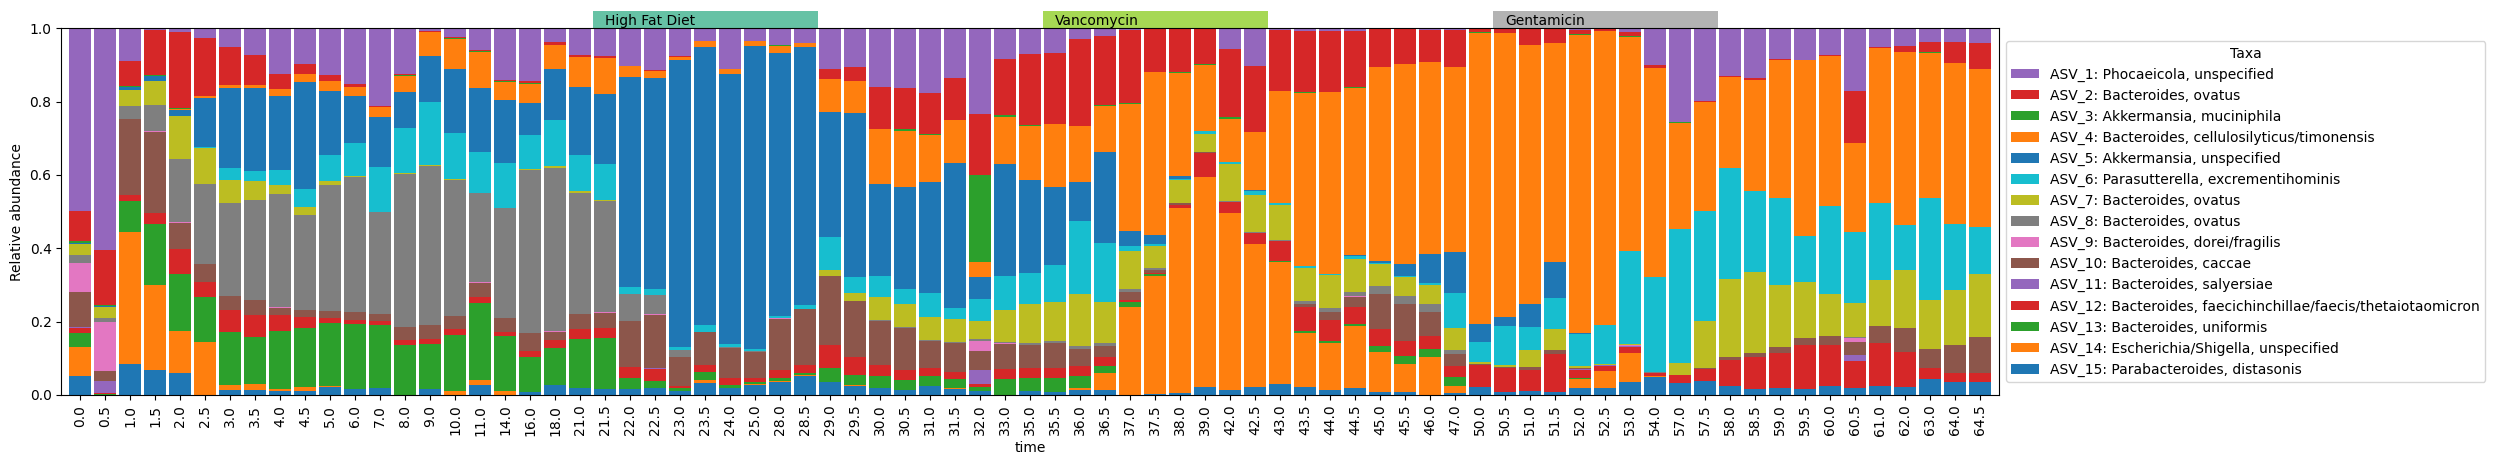

In [11]:
# Now we'll plot the data. First we use the sorted sample IDs from above
# to extract data for our subject, then we use matplotlib and pandas
# to plot.
rel_abund_subj = rel_abund[sample_ids]

fig, ax = plt.subplots(2, 1, sharex=True,
                       gridspec_kw={'hspace': 0.0, 'wspace': 0.0,
                                    'height_ratios' : [1,20]})

# The index [::-1] just reverses the order of the dataframe. We only do this
# so that the most abundant taxa are at the top of the plot. Note, we also
# reverse the ordering in the legend below. We also add the time data from
# the metadata file to the x axis.
rel_abund_subj_plot = rel_abund_subj[::-1].T
rel_abund_subj_plot['time'] = metadata.loc[sample_ids]['time']

rel_abund_subj_plot.plot.bar(
    x='time',
    width=0.9,
    figsize=(25,5),
    ax=ax[1],
    stacked=True,
    legend=True,
    )

ax[1].set_ylabel('Relative abundance')

# We'll also update the legend so that it displays <ASV>: <genus>, <species>
# data for each ASV.

handles, labels = ax[1].get_legend_handles_labels()

rdp['legend_tag'] = rdp.index + ': ' + \
    rdp['genus'] + ', ' + rdp['species']

legend_tags = list(rdp.loc[labels[::-1]]['legend_tag'])

ax[1].legend(
    handles = handles[::-1],
    labels = legend_tags,
    loc='center left',
    bbox_to_anchor=(1., 0.5),
    title='Taxa',
    )

ax[1].set_ylim([0,1])

# We can also use the perturbation dataset to highlight the times
# where perturbations were applied.
perturb_subj = perturbations[perturbations['subject'] == subj_ID]

df = pd.DataFrame(columns=list(perturb_subj.index) + ['time'])
df['time'] = metadata.loc[sample_ids]['time']
df['idx'] = range(df.shape[0])

for pert_name in perturb_subj.index:
    df[pert_name] = None
    start = perturb_subj.loc[pert_name]['start']
    end = perturb_subj.loc[pert_name]['end']
    index = np.logical_and(df['time'] >= start, df['time'] <= end)
    df.loc[index, pert_name] = 1
    ax[0].annotate(pert_name, (df['idx'][df['time'] == start], 0.2))

df.plot.bar(
    x='time',
    y=perturb_subj.index,
    width=1.0,
    colormap='Set2',
    ax=ax[0],
    stacked=True,
    legend=False,
    )

ax[0].axis('off')

## Preparing data for MDSINE2
Once MDSINE2 has parsed your `*.tsv` files, you can use the built in plotting tools, which we'll demonstrate here. We'll create truncated `*.tsv` files here to limit the number of ASVs to be plotted.

In [12]:
import mdsine2 as md2

[DEBUG] Using default logger (stdout, stderr).


In [13]:
# Read data into study object
healthy = md2.dataset.parse(
    name = healthy_dir.stem,
    metadata = tsv_files['metadata'],
    taxonomy = tsv_files['rdp_species'],
    reads = tsv_files['counts'],
    qpcr = tsv_files['qpcr'],
    perturbations = tsv_files['perturbations'],
)

[INFO] TaxaSet parsng new taxonomy table. Resetting
[INFO] No `name` found - assuming index is the name
[DEBUG] Reseting perturbations


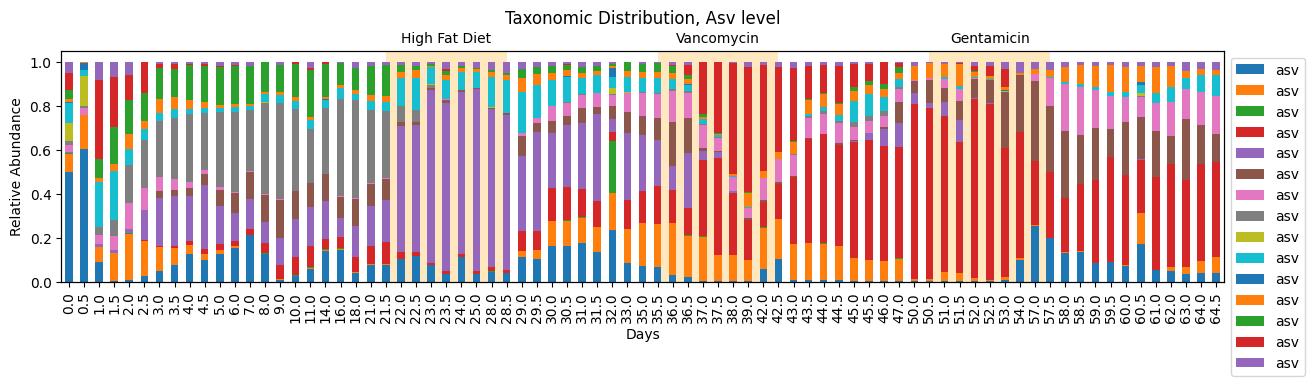

In [14]:
# The color of this plot may differ from the previous, but the data is the same.
fig, ax = plt.subplots(1,1, figsize=(15, 3))
ax = md2.visualization.taxonomic_distribution_over_time(healthy['2'], taxlevel='asv', ax=ax)
